<center>
    <u><font size="36">Homework 5</font></u>
    <h2>Rebecca Hinrichs</h2>
    <h4>MATH 4301 -- SPRING 2023</h4>
</center>

---
---

In [2]:
# Import numerical computation libraries
import math
import numpy as np
import scipy as sp

# Import graphic libraries
import matplotlib.pyplot as plt

# Set back-end display options
np.set_printoptions(precision = 4)

<center><br>Questions are from <b>Problem Set 8.2</b> in <br><i>Numerical Methods in Engineering with Python 3</i> by Jaan Kiusalaas</center>

---
<center><h2>Question 1</h2></center>

Use first central difference approximations to transform the boundary value problem shown into simultaneous equations $Ay=b$.
$$
\begin{align*}
y''=(2+x)y \\
y(0)=0 \\
y'(1)=5 \\
\end{align*}
$$
<br><br>

<center><hr style="width: 50%; border-color: black;"></center>  

First order central difference approximation is given by:
\begin{align*}
f'(x) = \frac{f(x + h) - f(x - h)}{2h} + O(h^2)
\end{align*}
where $O(h^2)$ refers to the incremental `h` which carries the residuals until convergence on the root.

We will compare our results with SciPy's numerical methods:
\begin{align*}
x &:independent \\
z &= y' \\
z' &= 2y + xy \\
\frac{\delta z}{\delta y} &= 2 + x \\
z(1) &= 5 \ \ \text{(the  Neumann  boundary  condition)}\\ 
y(0) &= 0 \ \ (y_0 = 0)
\end{align*}


The Matrix A is
 [[ 1.      0.      0.     ...  0.      0.      0.    ]
 [ 1.     -2.0008  1.     ...  0.      0.      0.    ]
 [ 0.      1.     -2.0008 ...  0.      0.      0.    ]
 ...
 [ 0.      0.      0.     ... -2.0012  1.      0.    ]
 [ 0.      0.      0.     ...  1.     -2.0012  1.    ]
 [ 0.      0.      0.     ...  0.      1.     -1.    ]]

The Right-hand side Vector b is
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.102]


	 x 	 y1 (LU, m=10)	 y2 (LU, m=100)	 y (SP, m=200)	 y' (SP, m=200)
   0.00000e+00    0.00000e+00     0.00000e+00     0.00000e+00     5.00000e+00
   2.04082e-02   -5.42165e+00    -5.71162e+01    -4.02000e-02     5.20509e+00
   4.08163e-02   -9.95716e+00    -1.13244e+02    -8.08000e-02     5.42077e+00
   6.12245e-02 

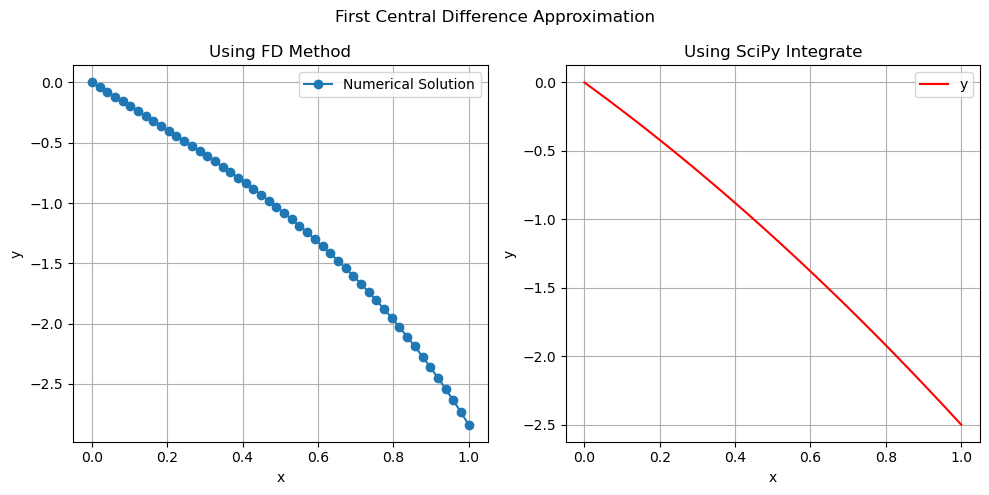

In [68]:
## APPROXIMATE THE SOLUTION BY FIRST-ORDER CENTRAL DIFFERENCE
# Define grid spaces
m = 50
h = 1.0 / (m-1)
x = np.linspace(0, 1, m)

# Initialize the solution vector
y = np.zeros(m)

# Set up the matrix A and right-hand side vector b
A = np.zeros((m, m))
b = np.zeros(m)

# Boundary conditions
A[0, 0] = 1  # y(0) = 0
b[0] = 0

# Discretize the equations
for i in range(1, m-1):
    A[i, i-1] = 1
    A[i, i] = -2 - h**2 * (2 + x[i])
    A[i, i+1] = 1
    b[i] = 0

# Neumann boundary condition using forward difference
A[-1, -1] = -1 # Neumann boundary 'x' * (-1)
A[-1, -2] = 1  # Neumann boundary -x_n
b[-1] = 5 * h  # Neumann boundary 'y'

# Solve the system
y = np.linalg.solve(A, b)

# Print the Solution
print("\nThe Matrix A is\n", A)
print("\nThe Right-hand side Vector b is\n", b)
print()

## SOLVE IVP USING FD APPROXIMATION
## example8_6
import math
def LUdecomp3(c, d, e):
    n = len(d)
    for k in range(1, n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    return c, d, e
def LUsolve3(c, d, e, b):
    n = int(len(d))
    for k in range(1, n):
        b[k] = b[k] - c[k-1]*b[k-1]
    b[-1] = b[n-1]/d[n-1]
    for k in range(n-2, -1, -1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    return b 
def equations(x,h,m): # Set up finite difference eqs.
    h2 = h*h  # y_{i-1} - 2y_i + y_{i+1} - h2(2y + xy)
    d = np.ones(m + 1)*(-2 - h2 * (2 + x)) # -2 -2h2 - xh2
    c = np.ones(m)
    e = np.ones(m)
    b = np.ones(m+1)
    d[0] = 1.0  # Neumann boundary 'x'
    e[0] = 0.0
    b[0] = 0.0
    c[-1] = 1.0  # Neumann boundary -x_n
    d[-1] = -1.0  # yEnd * 2h + y_{n-1}
    b[-1] = 5.0*h  # Neumann boundary 'y'
    return c,d,e,b
meshes = [10, 100] # Number of mesh spaces
for m in meshes:
    xStart = 0.0 # x at left end
    xStop = 1.0 # x at right end
    h = (xStop - xStart)/m
    x0 = np.arange(xStart,xStop + h,h)
    c,d,e,b = equations(x0,h,m)
    c,d,e = LUdecomp3(c,d,e)
    if m==10: x1, y1 = x, LUsolve3(c,d,e,b)
    elif m==100: x2, y2 = x, LUsolve3(c,d,e,b)

## FUNCTIONS FROM SCIPY
def fz(x,y): return 2*y + x*y
def fdy(x,y): return -(2 + x)
x_span = (0, 1)
m = 50
x0 = np.linspace(0, 1, m+1)
z0, y0 = np.array([5]), np.array([0])

sol_z = sp.integrate.solve_ivp(fz, x_span, z0, t_eval=x0)
sol_y = sp.integrate.solve_ivp(fdy, x_span, y0, t_eval=x0)

## PRING THE SOLUTION
print("\n\t x \t y1 (LU, m=10)\t y2 (LU, m=100)\t y (SP, m=200)\t y' (SP, m=200)")
for i in range(len(y1)):
    print('{:14.5e} {:14.5e} {:15.5e} {:15.5e} {:15.5e}'.format(x[i],y1[i],y2[i],sol_y.y[0][i],sol_z.y[0][i]))
print()

## PLOT THE SOLUTION
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.plot(x, y, '-o', label='Numerical Solution')
ax1.set_title('Using FD Method')
ax1.set_xlabel('x') 
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True)
# ax2.plot(sol_z.t, sol_z.y[0], c='b', label="y'")
ax2.plot(sol_y.t, sol_y.y[0], c='r', label="y")
ax2.set_title("Using SciPy Integrate")
ax2.set_ylabel("y")
ax2.set_xlabel("x")
ax2.legend()
ax2.grid(True)
fig.suptitle("First Central Difference Approximation")
fig.tight_layout();

---
<center><h2>Question 6</h2></center>

Solve the given boundary value problem with the finite difference method using $m=20$.
$$
\begin{align*}
y''= x y \\
y(1) = 1.5 \\
y(2) = 3 \\
\end{align*}
$$
<br><br>

In [147]:
## FUNCTIONS TO DETERMINE FINITE DIFFERENCE APPROXIMATIONS
''' Gifted by Dr.Z & textbook
'''
#
def LUdecomp3(c, d, e):
    n = len(d)
    for k in range(1, n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    return c, d, e
#
def LUsolve3(c, d, e, b):
    n = len(d)
    for k in range(1, n):
        b[k] = b[k] - c[k-1]*b[k-1]
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2, -1, -1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    return b 
#
# Set up finite difference equations
def equations(x, h, m, f1, f2): 
   h2 = h*h
   
   c = np.ones(m)
   d = np.ones(m + 1)
   e = np.ones(m)
   b = np.zeros(m + 1)
   
   for i in range(1, m): d[i] = -2.0 - x[i]*h2  # y''
   
   d[0] = 1.0; e[0] = 0.0;   b[0] = f1  # y(0) = 1.5
   d[m] = 1.0; c[m-1] = 0.0; b[m] = f2  # y(m) = 3.0
   
   return c, d, e, b
#
def finite_differences(x0, f0, xm, fm, m):
    xStart = x0       # x at left end point, x = 1.0
    xEnd = xm         # x at right end point, x = 2.0
    #
    h = (xEnd - xStart)/m
    x = np.zeros(m + 1)
    #
    for i in range(m + 1): x[i] = xStart + h*i
    #
    c,d,e,b = equations(x,h,m,f0,fm)
    #
    LUdecomp3(c, d, e)
    LUsolve3(c, d, e, b)
    #
    # Print Solution
    print("   x  ", "     y ")
    for i in range(0, m+1, 1):
        print('{:5.2f}'.format(x[i]), '{:9.4f}'.format(b[i]))
    print()
    #
    # Plot Solution
    plt.plot(x, b, '-o')
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.grid(True) 
    plt.show();

   x        y 
 1.00    1.5000
 1.05    1.5166
 1.10    1.5372
 1.15    1.5621
 1.20    1.5914
 1.25    1.6255
 1.30    1.6647
 1.35    1.7093
 1.40    1.7597
 1.45    1.8162
 1.50    1.8793
 1.55    1.9495
 1.60    2.0272
 1.65    2.1130
 1.70    2.2075
 1.75    2.3114
 1.80    2.4255
 1.85    2.5504
 1.90    2.6872
 1.95    2.8367
 2.00    3.0000



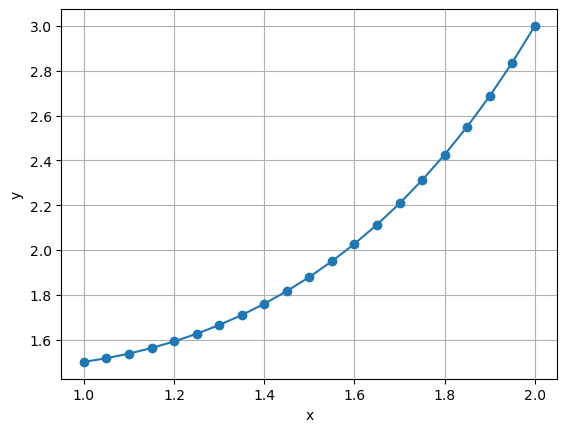

In [146]:
## <<-- ANSWER THE QUESTION -->>
finite_differences(x0=1.0, f0=1.5,  # left boundary: f(1) = 1.5
                   xm=2.0, fm=3.0,  # right boundary: f(2) = 3
                   m=20)

<br>

Using `LUdecomp3`, we performed the `PLU` decomposition factorization method on the tridiagonal matrix composed of diagonals `c`,`d`, and `e` (where `d` is the principal component) into the product of `L` and `U` (lower and upper triangular matrices) respectively. Using `LUsolve3`, we solved for the vector `x` in the linear system of equations where `A` is composed of those same `c`,`d` and `e` matrices, and `b` is the right-hand side vector in the equation $Ax=b$. Using `equations`, we created the Jacobian matrix by finding `finite_differences` given the range of all $x$ between the boundary values $(x0, f0)$ and $(x1, f1)$.
<br><br>

---
<center><h2>Question 7</h2></center>

Solve the given boundary value problem with the finite difference method using $m=20$.
$$
\begin{align*}
y'' + 2y' + y = 0 \\
y(0) = 0 \\
y(1) = 1 \\
\end{align*}
$$
Exact solution is $y = x e^{1-x}$.
<br><br>


   x   | Num Solution (LU) | Num Solution (np) | Num Solution (sp) | Exact Solution
----------------------------------------------------------------------------------
 0.00        -0.0000           -0.0000               1.0000             0.0000
 0.05         0.2124            0.2124               0.0000             0.1293
 0.10         0.3857            0.3857               0.1357             0.2460
 0.15         0.5267            0.5267               0.2575             0.3509
 0.20         0.6408            0.6408               0.3665             0.4451
 0.25         0.7327            0.7327               0.4636             0.5293
 0.30         0.8062            0.8062               0.5498             0.6041
 0.35         0.8645            0.8645               0.6260             0.6704
 0.40         0.9103            0.9103               0.6928             0.7288
 0.45         0.9457            0.9457               0.7512             0.7800
 0.50         0.9725            0.9725    

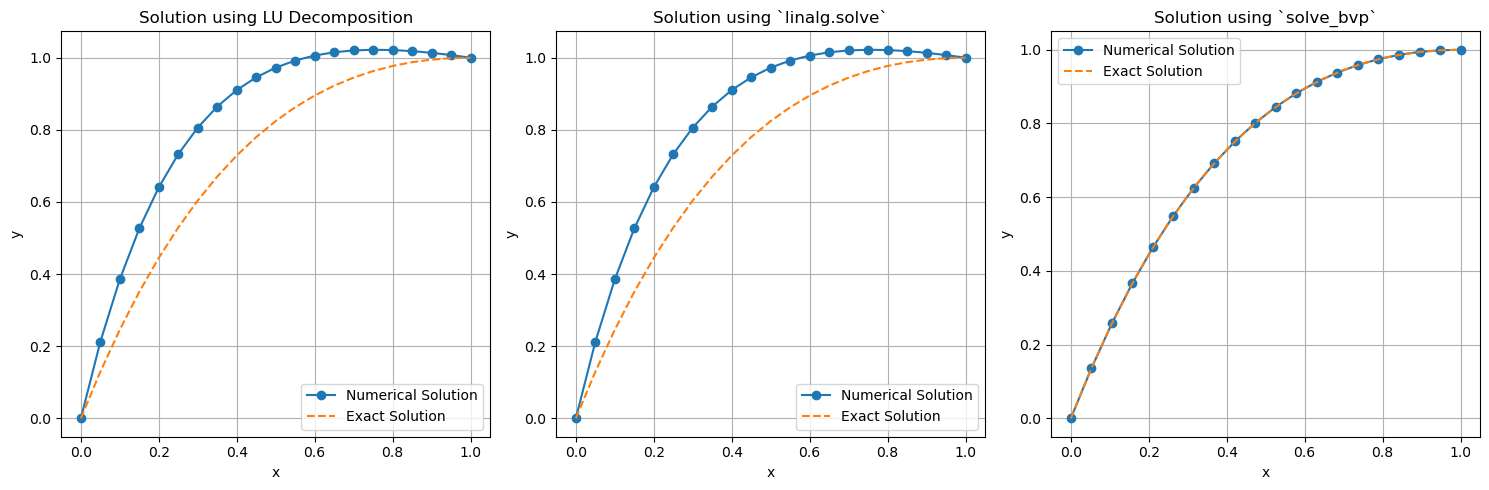

In [443]:
## FUNCTIONS TO DETERMINE FINITE DIFFERENCE APPROXIMATIONS
def finite_differences(m, bv):  # <<-- using LU factorization
    xStart, yStart, xEnd, yEnd = float(bv[0,0]), float(bv[0,1]), float(bv[1,0]), float(bv[1,1])
    h = (xEnd-xStart) / m                    # h: grid spacing
    x = np.linspace(xStart, xEnd, m+1)       # x: set up mesh grid
    y, z = np.zeros(m + 1), np.zeros(m + 1)  # for LU decomposition
    y[0], z[0] = yStart, yStart              # initial conditions
    
    # Discretization using finite difference method
    for i in range(m):
        z[i + 1] = z[i] - h * (2 * z[i] + y[i])
        y[i + 1] = y[i] + h * z[i]

    # Construct the coefficient matrix A and the right-hand side vector b
    A = np.zeros((m + 1, m + 1))
    b = np.zeros(m + 1)

    for i in range(1, m):
        A[i, i - 1] = 1 / h ** 2 - 2 / h
        A[i, i] = -2 / h ** 2 + 1
        A[i, i + 1] = 1 / h ** 2 + 2 / h
        b[i] = -y[i - 1]

    # Boundary conditions
    A[0, 0] = xEnd - xStart
    b[0] = yStart
    A[m, m] = xEnd
    b[m] = yEnd

    # Solve the linear system using LU decomposition
    from scipy.linalg import lu_factor, lu_solve
    lu_decomposition = lu_factor(A)
    y = lu_solve(lu_decomposition, b)

    return x, y

def finite_differences2(m, bv):  # <<-- using linalg.solve (which uses LU factorization)
    xStart, yStart, xEnd, yEnd = float(bv[0,0]), float(bv[0,1]), float(bv[1,0]), float(bv[1,1])
    h = (xEnd-xStart) / m
    x = np.linspace(xStart, xEnd, m+1)
    A = np.zeros((m+1, m+1))
    b = np.zeros(m+1)
    
    # Discretize the differential equation
    for i in range(1, m):
        A[i, i-1] = 1 / h**2 - 2 / h
        A[i, i] = -2 / h**2 + 1
        A[i, i+1] = 1 / h**2 + 2 / h
        
    # Implement the boundary conditions
    A[0, 0] = xStart + xEnd
    b[0] = yStart
    A[m, m] = xEnd
    b[m] = yEnd
    
    # Solving the system of equations (numerically)
    y = np.linalg.solve(A, b)
    
    return x, y

## CONFIRMATION FUNCTION TO DETERMINE FINITE DIFFERENCE APPROXIMATIONS
def solver_check(m, bv):
    xStart, yStart, xEnd, yEnd = float(bv[0,0]), float(bv[0,1]), float(bv[1,0]), float(bv[1,1])

    # Discretize the differential equation
    def fun(x,y): 
        dydx = y[1]
        dzdx = -2*y[1] - y[0]
        return np.vstack([dydx, dzdx])               # rewrite y'' as y'
        # src = f0(x)                                # set b = exact solution
        # return np.vstack([-2*y[1,:]-y[0,:], src])  # rewrite y'' as y'

    # Implement the boundary conditions
    def bc(y0, y1): return np.array([y0[0]-yStart, y1[0]-yEnd])
    
    x = np.linspace(xStart, xEnd, m)
    # y = np.zeros((1, x.size))
    y0 = np.zeros((2,m))

    from scipy.integrate import solve_bvp
    sol = solve_bvp(fun, bc, x, y0)

    # return sol.x[1:], sol.y[0,:]
    return sol.x, sol.y[0,:]
##
## PROVIDED PARAMETERS
def f0(x): return x * np.exp(1 - x)  # the given exact solution
bounds = np.array([[0.0, 0.0],       # left boundary:  f(0)=0
                   [1.0, 1.0]])      # right boundary: f(1)=1
m = 20                               # number of mesh spaces
##
## ANSWER THE QUESTION
x1, y1 = finite_differences(m, bounds)
x2, y2 = finite_differences2(m, bounds)
x3, y3 = solver_check(m, bounds)
#
# Print the Solution
x0 = np.linspace(bounds[0,0], bounds[1,0], m + 1)
for i in range(m + 1): y0[i] = f0(x0[i])
print("\n   x   | Num Solution (LU) | Num Solution (np) | Num Solution (sp) | Exact Solution")
print("----------------------------------------------------------------------------------")
for i in range(int(bounds[0,0]), m+1, int(bounds[1,0])):
    print('{:5.2f}'.format(x0[i]),'{:14.4f}'.format(y1[i]),'{:17.4f}'.format(y2[i]),'{:20.4f}'.format(y3[i-1]),'{:18.4f}'.format(y0[i]))
print()
#
# Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.plot(x1, y1, '-o', label='Numerical Solution')
ax1.plot(x0, y0, '--', label='Exact Solution')
ax1.set_title('Solution using LU Decomposition')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True)
ax2.plot(x2, y2, '-o', label='Numerical Solution')
ax2.plot(x0, y0, '--', label='Exact Solution')
ax2.set_title('Solution using `linalg.solve`')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid(True)
ax3.plot(x3, y3, '-o', label='Numerical Solution')
ax3.plot(x0, y0, '--', label='Exact Solution')
ax3.set_title('Solution using `solve_bvp`')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.legend()
ax3.grid(True)
plt.tight_layout()
plt.show();

<br>

For this question, we wanted to be sure we were getting the correct results, so after a whole bunch of trial & error, we decided to benchmark test our decomposition method against SciPy's `solve_bvp` method. Our results indicate that the SciPy function performed much better at interpolating this problem. `solve_bvp` is formulated to pass first-order derivatives, so we transformed our equation into a first-order system by introducing the substitution variable `z` and rewriting the equation as $y'=z$ so that $z'=-2z-y$. This allowed us to return the derivatives of $y$ and $z$, specifying the boundary conditions through our function `bc`. We were able to get a perfect fit with the exact solution using this method. The reason our `lu_factorization` and `np.linalg.solve` decomposition methods performed so poorly was because though the method is excellent for solving large systems of equations, it's not directly suited to solve linear homogeneous ordinary differential equations like our problem. To solve our problem using LU decomposition, we would need to likewise express each derivative of $y$ as a linear combination of each other, as we had done when we transformed our second-order equation in order to utilize the `solve_bvp` method. After a bit of tribulation, we realize that though we did begin preparation for iterating the method by implementing a $z$ vector to hold the derivatives of $y$, we forgot to implement it before turning to the solver for comparison.
<br><br>

---
<center><h2>Question 8</h2></center>

Solve the given boundary value problem with the finite difference method using $m=20$.
$$
\begin{align*}
x^2 y'' + x y' + y = 0 \\
y(1) = 0 \\
y(2) = 0.638961 \\
\end{align*}
$$
Exact solution is $y = sin (ln x)$.
<br><br>


   x   | Num Solution (LU) | Num Solution (sp) | Exact Solution
----------------------------------------------------------------------------------
 1.00         0.0000               0.0000            0.0000
 1.05         0.0488               0.0513            0.0488
 1.10         0.0952               0.0999            0.0952
 1.15         0.1393               0.1461            0.1393
 1.20         0.1813               0.1899            0.1813
 1.25         0.2213               0.2315            0.2213
 1.30         0.2594               0.2710            0.2594
 1.35         0.2956               0.3085            0.2956
 1.40         0.3302               0.3442            0.3302
 1.45         0.3631               0.3781            0.3631
 1.50         0.3944               0.4104            0.3944
 1.55         0.4244               0.4410            0.4244
 1.60         0.4529               0.4702            0.4529
 1.65         0.4801               0.4980            0.4801
 1.70       

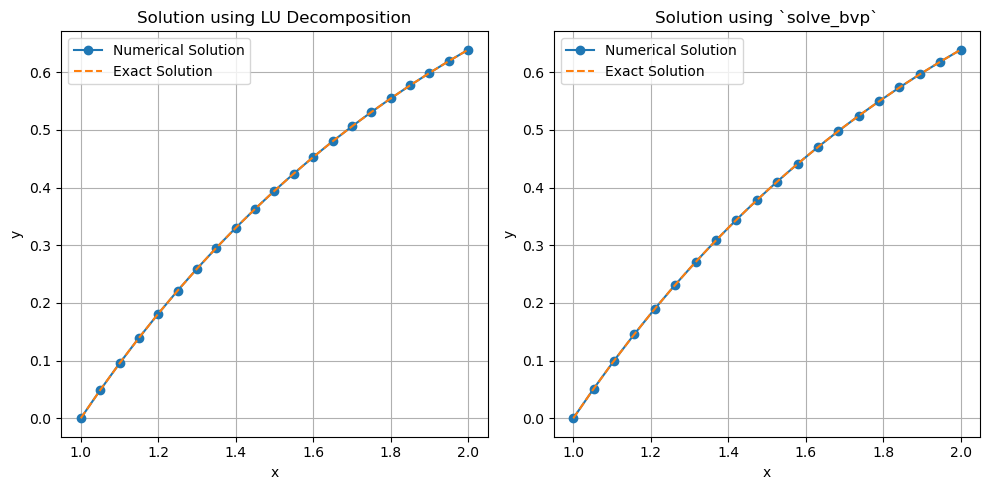

In [112]:
## FUNCTIONS TO DETERMINE FINITE DIFFERENCE APPROXIMATIONS
def finite_differences(m, bv):
    xStart, yStart, xEnd, yEnd = float(bv[0,0]), float(bv[0,1]), float(bv[1,0]), float(bv[1,1])
    h = (xEnd-xStart) / m
    x = np.linspace(xStart, xEnd, m+1)
    A = np.zeros((m+1, m+1))
    b = np.zeros(m+1)
    
    # Discretize the differential equation
    for i in range(1, m):
        A[i, i+1] = x[i]**2 / h**2 + x[i] / (2 * h)   # e: upper diagonal
        A[i, i] = -2 * x[i]**2 / h**2 + 1             # d: main diagonal
        A[i, i-1] = x[i]**2 / h**2 - x[i] / (2 * h)   # c: lower diagonal
        
    # Implement the boundary conditions
    A[0, 0] = xStart
    b[0] = yStart
    A[m, m] = xEnd - xStart
    b[m] = yEnd

    # Solve the linear system using LU decomposition
    from scipy.linalg import lu_factor, lu_solve
    lu_decomposition = lu_factor(A)
    y = lu_solve(lu_decomposition, b)
    y[0], y[-1] = yStart, yEnd
    
    # Solving the system of equations (uses LU decomposition)
    y2 = np.linalg.solve(A, b)  # <<-- for double-checking, was good!
    
    return x, y

## CONFIRMATION FUNCTION TO DETERMINE FINITE DIFFERENCE APPROXIMATIONS
def solver_check(m, bv):
    xStart, yStart, xEnd, yEnd = float(bv[0,0]), float(bv[0,1]), float(bv[1,0]), float(bv[1,1])

    # Discretize the differential equation
    def fun(x,y): 
        # src = f0(x)                            # set b = exact solution
        return np.vstack((y[1], -(x*y[1] + y[0])/x**2))  # rewrite y'' as y'

    # Implement the boundary conditions
    def bc(y0, y1): return np.array([y0[0]-yStart, y1[0]-yEnd])
    
    x, y0 = np.linspace(xStart, xEnd, m), np.zeros((2, m))
    y0[0] = np.interp(x, [xStart, xEnd], [yStart, yEnd])

    from scipy.integrate import solve_bvp
    sol = solve_bvp(fun, bc, x, y0)
    
    return sol.x, sol.y[0,:]
##
## PROVIDED PARAMETERS
def f0(x): return np.sin(np.log(x))  # the given exact solution
bounds = np.array([[1.0, 0.0],       # left boundary:  f(1)=0
                   [2.0, 0.638961]]) # right boundary: f(2)=0.638961
m = 20                               # number of mesh spaces
##
## ANSWER THE QUESTION
x1, y1 = finite_differences(m, bounds)
x2, y2 = solver_check(m, bounds)
#
# Print the Solution
x0 = np.linspace(bounds[0,0], bounds[1,0], m + 1)
for i in range(m + 1): y0[i] = f0(x0[i])
print("\n   x   | Num Solution (LU) | Num Solution (sp) | Exact Solution")
print("----------------------------------------------------------------------------------")
for i in range(0, m, 1):
    print('{:5.2f}'.format(x0[i]),'{:14.4f}'.format(y1[i]),'{:20.4f}'.format(y2[i]),'{:17.4f}'.format(y0[i]))
print()
#
# Plot the results
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(x1, y1, '-o', label='Numerical Solution')
ax1.plot(x0, f0(x0), '--', label='Exact Solution')
ax1.set_title('Solution using LU Decomposition')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True)
ax2.plot(x2, y2, '-o', label='Numerical Solution')
ax2.plot(x0, f0(x0), '--', label='Exact Solution')
ax2.set_title('Solution using `solve_bvp`')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show();

<br>

Our solution for this polynomial second-order boundary value problem perfectly approximated the exactly solution within the range using both `lu_factorization` and `solve_bvp` methods. This time, we properly utilized the LU factorization method by implementing it after properly fitting the Jacobian matrix. The latter method requires equal care in fitting the function with the proper conversion of the second-order ordinary differential equation into a first-order ODE.
<br><br>

---
<center><h2>Question 9</h2></center>

Solve the given boundary value problem with the finite difference method using $m=20$.
$$
\begin{align*}
y'' = y^2 sin y \\
y'(0) = 0 \\
y(\pi) = 1 \\
\end{align*}
$$
<br><br>


   x   | y (Newton-Raphson) |     y (SciPy)
----------------------------------------------------------------------------------
 0.00          0.4209               0.4131
 0.16          0.4209               0.4133
 0.31          0.4227               0.4139
 0.47          0.4263               0.4150
 0.63          0.4317               0.4165
 0.79          0.4391               0.4184
 0.94          0.4485               0.4207
 1.10          0.4601               0.4235
 1.26          0.4739               0.4268
 1.41          0.4903               0.4305
 1.57          0.5095               0.4347
 1.73          0.5318               0.4394
 1.88          0.5577               0.4446
 2.04          0.5876               0.4504
 2.20          0.6222               0.4566
 2.36          0.6624               0.4635
 2.51          0.7093               0.4709
 2.67          0.7642               0.4876
 2.83          0.8292               0.5072
 2.98          0.9066               0.5298
 3.14       

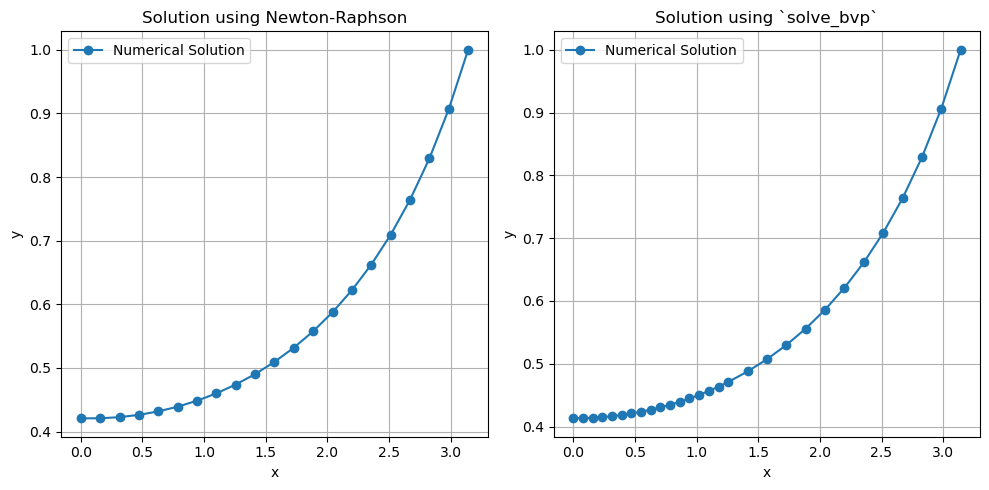

In [122]:
## FUNCTIONS TO SOLVE NONLINEAR BVP USING NEWTON-RAPHSON ITERATIVE METHOD
def nonlinear_bvp_solver(m, bv, tol=1e-14, max_iter=1000):
    # Define grid spaces
    x0_Start, y0_Start = float(bv[0,0]), float(bv[0,1])  # y  initial value at x_0
    x0_End, y1_End = float(bv[1,0]), float(bv[1,1])      # y' initial value at x_m
    x, y0, h = np.linspace(x0_Start, x0_End, m+1), np.zeros(m+1), (x0_End-x0_Start)/m
    
    # Define the function and its Jacobian matrix
    def func(y):
        F = np.zeros(y.shape)
        F[1:-1] = (y[:-2] - 2*y[1:-1] + y[2:]) / h**2 - y[1:-1]**2 * np.sin(y[1:-1])
        F[0] = (y[1] - y[0]) / h - y0_Start  # Neumann condition at x=0
        F[-1] = y[-1] - y1_End               # Dirichlet condition at x=pi
        return F
    def jacobian(y):
        main_diag = -2/h**2 - 2*y[:]*np.sin(y[:]) - y[:]**2 * np.cos(y[:])
        off_diag = 1/h**2 * np.ones(m)
        J = np.diag(main_diag, 0) + np.diag(off_diag, -1) + np.diag(off_diag, 1)
        J[0, 0] = -1/h
        J[0, 1] = 1/h
        J[-1, -1] = y1_End                    # Corresponds to Dirichlet BC
        return J
    
    # Newton-Raphson iteration
    while h > tol:
        for iter in range(max_iter):
            delta_y = np.linalg.solve(jacobian(y0), -func(y0))
            y0 += delta_y
            if np.linalg.norm(delta_y, np.inf) < tol: return x, y0

    return x, y0
##
## CONFIRMATION FUNCTION TO DETERMINE FINITE DIFFERENCE APPROXIMATIONS
def solver_check(m, bv):
    x0_Start, y0_Start = float(bv[0,0]), float(bv[0,1])  # y  initial value at x_0
    x0_End, y1_End = float(bv[1,0]), float(bv[1,1])      # y' initial value at x_m
    x, y0 = np.linspace(x0_Start, x0_End, m+1), np.zeros((2, m+1))

    # Discretize the differential equation
    def fun(x,y): return np.vstack((y[1], y[0]**2 * np.sin(y[0])))  # u, u'=y''

    # Implement the boundary conditions
    def bc(ya, yb): return np.array([ya[1], yb[0] - 1])
    y0[0] = np.interp(x, [x0_Start, x0_End], [y0_Start, y1_End])

    # Solve the linear system using Hermite interpolation
    from scipy.integrate import solve_bvp
    sol = solve_bvp(fun, bc, x, y0)
    
    return sol.x, sol.y[0,:]
##
## PROVIDED PARAMETERS
bounds = np.array([[0.0,   0.0],     # left boundary:  f'(0)=0
                   [np.pi, 1.0]])    # right boundary: f(pi)=1
m = 20                               # number of mesh spaces
##
## ANSWER THE QUESTION
x1, y1 = nonlinear_bvp_solver(m, bounds)
x2, y2 = solver_check(m, bounds)
#
# Print the Solution
x0 = np.linspace(bounds[0,0], bounds[1,0], m + 1)
# for i in range(m + 1): y0[i] = f0(x0[i])
# print("\n   x   | Num Solution (LU) | Num Solution (sp) | Exact Solution")
print("\n   x   | y (Newton-Raphson) |     y (SciPy)")
print("----------------------------------------------------------------------------------")
for i in range(0, m+1, 1):
    print('{:5.2f}'.format(x0[i]),'{:15.4f}'.format(y1[i]),'{:20.4f}'.format(y2[i]))
    # print('{:5.2f}'.format(x0[i]),'{:14.4f}'.format(y1[i]),'{:20.4f}'.format(y2[i]),'{:17.4f}'.format(y0[i]))
print()
#
# Plot the results
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(x1, y1, '-o', label='Numerical Solution')
# ax1.plot(x0, f0(x0), '--', label='Exact Solution')
ax1.set_title('Solution using Newton-Raphson')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True)
ax2.plot(x2, y2, '-o', label='Numerical Solution')
# ax2.plot(x0, f0(x0), '--', label='Exact Solution')
ax2.set_title('Solution using `solve_bvp`')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show();

--- 
--- 

<center><h2>Analysis</h2></center><br><br>

In this assignment, we performed linear stability analysis where $x_n = x_* + \epsilon_n$ and the next iteration $x_{n+1} = x_* + \epsilon_{n+1}$ can be determined by $x_* + \epsilon_{n+1} = f(x_* + \epsilon_n)$ when $x_*$ references some fixed point in our data at the coordinates $(x_*, f(x_*))$ and $\epsilon_n$ represents a negligible value from the fixed point. With each iteration, $\epsilon_{n+1}$ describes the fixed point's stability by increasing or decreasing, which we can determine by performing a Taylor series expansion of Newton's iterative method using Simpson's Rule, which is simply a combination of the Trapezoidal Rule and the Midpoint Rule, where the order of errors is $O(n^5)$ (if $x_*$ is stable, then $|f'(x_*)| < 1$ where $f'$ is the iteration representing the change in $f$, i.e. $f'=\delta{x_*}$ at the next iteration $n+1$; otherwise, $x_*$ is unstable because $|\frac{\epsilon_{n+1}}{\epsilon_{n}}|>1$ and grows incrementally).

<center>
<hr style="width: 50%; border-color: black;">
</center>

Central difference approximation is an iterative method for finding $x$ given a <i>transformed</i> system of equations with known outcome $b$. The method is based on combining Newton's and Euler's methods by searching a given range of the function for its roots by utilizing the change in $x$ provided by the function's integration in ratio to its domain space. The modified Euler's method is given by $x_{n+1} = x_n + \frac{\Delta t}{2} (f(t_n, x_n) + f(t_n + \Delta t, x_{n+1}^P))$ where $x_{n+1}^P$ is a predictor variable so that $x_{n+1}^P = x_n + \Delta t f(t_n, x_n)$. This is known as a member of the more flexible Runge-Kutta Method (second-order), which assigns $k_1 = \Delta t f(t_n, x_n)$ and $k_2 = \Delta t f(t_n + \alpha \Delta t, x_n + \beta k_1)$ where $\alpha$ and $\beta$ are the constraints of the boundary so that upon each iteration, the subsequent value for $x$ can be found by $x_{n+1} = x_n + \frac{1}{2} (k_1 + k_2)$. The iterations are achieved via Taylor series expansion of $x_{n+1} = x_n + a k_1 + b k_2$ where $a$ and $b$ are weights of the averaged slopes, finalizing our midpoint (central difference) formula where, at $a=0$ (starting point) and $b=1$ (ending point) the next approximated $x$ is given by $x_{n+1} = x_n + k_2$, which is what we have here for our second-order ODE. The Runge-Kutta method defines $\Delta t$ in ratio to $h = \frac{\text{size of total search space}}{\text{number of search spaces}}$, requiring user-supplied parameters of the range and increment count. 
<br><br>
Since we are looking at a linear equation, we can count on the Shooting Method to find our solution within only 3 iterations. The reason for this is because when we substitute our 2nd order ODE of $\frac{d^2 y}{d x^2} = f(x, y, \frac{dy}{dx})$ as $\frac{dy}{dx} = z$ so that $\frac{dz}{dx} = f(x,y,z)$, we can search the two derivative equations in parallel and find the shared root using our given initial values as parameters. To calculate, we find the roots in the outer loop and integrate the differential equations in the inner loop. Using the Taylor expansion we get $y(x+h)$ and $y(x-h$ to give us the differences between the two equations as $y(x+h) - y(x-h)$ and $y(x+h) + y(x-h)$ with increment step $h$ so that the errors between the two, denoted by $O(h^2)$, will cause the two equations to essentially "find" each other by setting them equal. In other words, to get $y(x)$ at $\Delta x:h = 0$, we approximate the central difference by setting the constraints:<br>

\begin{align*}
y''(x) &→ y'(x + \Delta x:h) \\ 
\frac{y(x+h) - 2y(x) + y(x-h)}{h^2} + O(h^2) &→ \frac{y(x+h) - y(x-h)}{2h} + O(h^2) \\
\end{align*}

giving us the Discrete Laplace Equation to search a grid space made up of Cartesian coordinates $(x_i, y_j)$: 
\begin{align*}
\frac{\delta^2 \Phi}{\delta x^2} \bigg|_{i,j} = \frac{\Phi_{i+1,j} - 2 \Phi_{i,j} + \Phi_{i-1,j}}{(\delta x)^2} \ \ and \ \ 
\frac{\delta^2 \Phi}{\delta y^2} \bigg|_{i,j} = \frac{\Phi_{i,j+1} - 2 \Phi_{i,j} + \Phi_{i,j-1}}{(\delta y)^2}
\end{align*}

using the central difference approximation in each direction. These equations combine via indices to give us $4 \Phi_{i,j} - \Phi_{i+1,j} - \Phi_{i-1,j} - \Phi_{i,j+1} - \Phi_{i,j-1} = 0$. In order to construct $\Phi$ into vectors to form our matrix $A$, we perform Natural Ordering by iterating our results rowwise (starting at our largest column, in decreasing fashion) to get each 2-dimensional index into a single index $k$ where $k = i + (j-1) n_x$ ($n_x$ is the number of rows / grid points in the $x$ direction) so that $4 \Phi_k - \Phi_{k-1} - \Phi_{k+1} - \Phi_{k-n_x} - \Phi_{k+n_x} = 0$ or by implementing the (much simpler) construction of the Jacobian matrix by setting the diagonals equivalent to the central difference equations, giving us $A \Phi = b$. Boundary conditions suffice to populate the outer grid points of our matrix $A \Phi = b$ and the Laplace equation populates the coefficients of the diagonals of $A$ as a banded sparse matrix.